<header style="display:flex">
<img src="../gear-wrench-icon.png" width="300" syule="position: absolute">
<div>
<h2>نصب پکیج ها:</h2><br>
 اگر بخواهیم با pip چهار تا پکیچ jupyter numpy pandas matplotlib نصب کنیم تو ترمینال خواهیم داشت: <br> 
<code> pip install jupyter numpy pandas matplotlib </code> <br>
اگه آناکوندار رو نصب داشته باشیم: <br>
<code>conda install jupyter numpy pandas matplotlib</code><br>
<br>%matplotlib inline
<br>کاری که این خط انجام میده این است که پلات ما مستقیما در ژوپیتر نوت بوک مون نشون داده میشه. <br>
اگر فایل ما پسوند py.دارد به خاطر داشته باشیم که این دستور توسط خود پایتون پشتیبانی نمی شود. <br>
<br>.__version__ attribute:<br>
بعد از اسم پکیج ها اگه این اتریبیوت استفاده کنیم ورژن اون پیکج رو برمیگردونه. <br><br>
pd.read_excel()<br>
زمانی که یک فایل اکسل رو با کمک این تابع در یک متغییر قرار میدهیم، در واقع فایل های اکسل رو بصورت  Pandas dataframes در متغییر ها ذخیره میشود.
</div>
</header>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# print out the versions of our NumPy and Pandas packages
print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

NumPy version: 1.24.3
Pandas version: 2.0.3


In [3]:
# print out the contents of the folder
%ls

 Volume in drive D is Hard Disk
 Volume Serial Number is 0C1D-0743

 Directory of D:\MA.Malekzadeh\Github\Articul\Python-For-Undergrad-Engineers\Plotting-a-Stress-Strain-Curve-with-Python-and-Matplotlib

02/18/2024  10:57 AM    <DIR>          .
02/18/2024  09:58 AM    <DIR>          ..
02/18/2024  09:45 AM    <DIR>          .ipynb_checkpoints
01/19/2024  03:13 PM            36,864 aluminum6061.xls
02/18/2024  10:40 AM            24,871 engineering-formula.png
01/19/2024  03:13 PM            38,912 steel1045.xls
02/18/2024  10:57 AM            13,512 stress_strain_curve_with_python.ipynb
               4 File(s)        114,159 bytes
               3 Dir(s)  622,874,480,640 bytes free


In [9]:
# The data from the two excel files will be stored in two Pandas dataframes
steel_df = pd.read_excel("./steel1045.xls")
al_df = pd.read_excel("./aluminum6061.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [10]:
# view the first five rows of each dataframe
steel_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


In [11]:
al_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


FORCE: اندازه گیری نیرو از لودسل بر حسب پوند، نیرو بر حسب پوند. <br>
EXT: اندازه گیری های گسترش از کشش سنج مکانیکی بر حسب درصد (%)، کرنش بر حسب درصد. <br>
CH5: خواندن گسترش از کشش سنج لیزری بر حسب درصد (%)، کرنش بر حسب درصد.

در مرجله بعد میخواهیم یک four Pandas series با کمک روابط زیر و ستون های ['FORCE'] و ['CH5'] دیتافریم های steel_df و al_df داشته باشیم. <br>
میتوان از روابط زیر تنش (σ)، کرنش(ϵ) از نیرو(F)، و سطح مقطع - دایره(A) بدست آورد. بنابراین نمونه ما round test piece بوده (ازجزوه) <br>
برای نمونه های steel and aluminum ما قطر 0.506in بوده.
<img src="engineering-formula.png">


In [12]:
strain_steel = steel_df['CH5']*0.01
d_steel = 0.506    # test bar diameter = 0.506 inches
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

strain_al = al_df['CH5']*0.01
d_al = 0.506       # test bar diameter = 0.506 inches
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))

# یک plot سریع بسازید 
ما الان تو 4 تا سری دیتا فریمه تست کشش مون رو داریم و میتونیم با Matplotlib's یه plot سریع رسم کنیم. <code>plt.plot()</code> <br>
اولین جفت x,y که به <code>plt.plot()</code> منتقل می کنیم، strain_steel و stress_steel است و برای دمین جفت x,y مون strain_al,stress_al قرار میدیم. <br>
<code>plt.show()</code> پلات رو بهمون نشون میده.

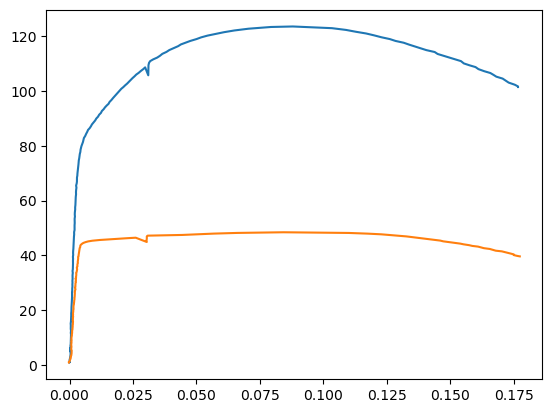

In [17]:
plt.plot(strain_steel,stress_steel,strain_al,stress_al)

plt.show()

# اضافه کردن برچسب های محور، عنوان و یک شرح
اینها با 3 تا متد در Matplotlib امکان پذیر است.
<table>
<thead><tr>
<th>Matplotlib method</th>
<th>description</th>
<th>example</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>plt.xlabel()</code></td>
<td>x-axis label</td>
<td><code>plt.xlabel('strain (in/in)')</code></td>
</tr>
<tr>
<td><code>plt.ylabel()</code></td>
<td>y-axis label</td>
<td><code>plt.ylabel('stress (ksi)')</code></td>
</tr>
<tr>
<td><code>plt.title()</code></td>
<td>plot title</td>
<td><code>plt.title('Stress Strain Curve')</code></td>
</tr>
<tr>
<td><code>plt.legend()</code></td>
<td>legend</td>
<td><code>plt.legend(['steel','aluminum'])</code></td>
</tr>
</tbody>
</table>

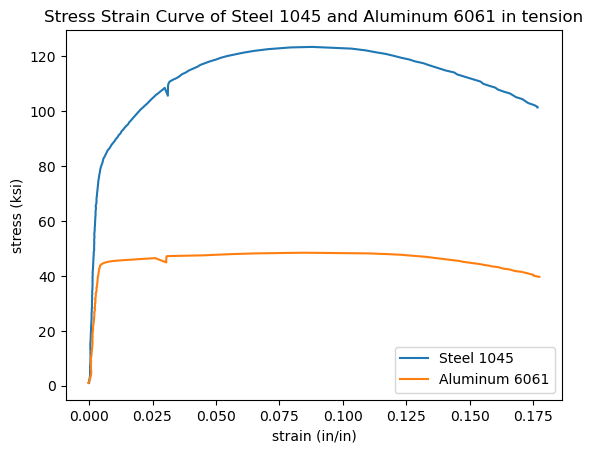

In [19]:
plt.plot(strain_steel,stress_steel,strain_al,stress_al)
plt.xlabel('strain (in/in)')
plt.ylabel('stress (ksi)')
plt.title('Stress Strain Curve of Steel 1045 and Aluminum 6061 in tension')
plt.legend(['Steel 1045','Aluminum 6061'])

# سیو کردن پلات بصورت یک فایل png.
اینکارو میشه با متد <code>plt.savefig()</code> کتابخانه Matplotlib انجام داد. <br>
در سلول زیر پلاتی که ساخته بودیم دوباره میسازیم با این تفاوت که اون رو با فرمت png ذخیره میکنیم. <br>
argument ه dpi=300 داخل متد <code>plt.savefig()</code> میاد resolution تصویر ذخیره شده مون رو مشخص میکنه. <br> 
تصویر stress-strain_curve.png در دایرکتوری که Jupyter notebook اجرا کردیم ذخیره میشود.

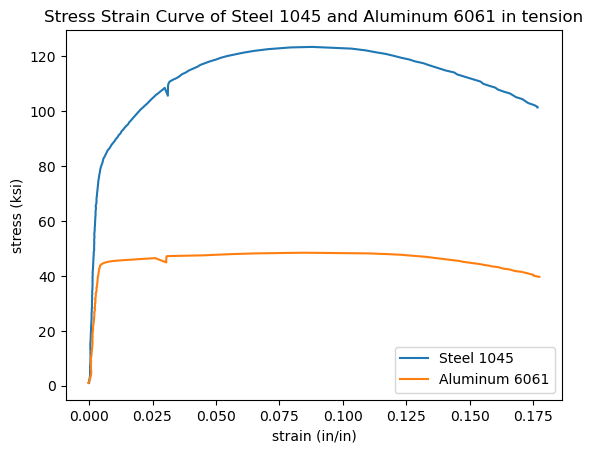

In [20]:
plt.plot(strain_steel,stress_steel,strain_al,stress_al)
plt.xlabel('strain (in/in)')
plt.ylabel('stress (ksi)')
plt.title('Stress Strain Curve of Steel 1045 and Aluminum 6061 in tension')
plt.legend(['Steel 1045','Aluminum 6061'])

plt.savefig('stress-strain_curve.png', dpi=300, bbox_inches='tight')
plt.show()